# Weatherdata for IPM Plateform

## 1. import weather data modules

In [1]:
from weatherdata.ipm import WeatherDataHub 

## 2. Access to weatherdatasource available on the platefom

In [2]:
ws=WeatherDataHub()

In [ ]:
ws.list_resources()

## 3. Get ressource for a specific weatherdataresource 

To connect to the meteo resource, simply enter the name of the meteo resource in the get_ressource function. 

In [3]:
fmi=ws.get_ressource(name='Finnish Meteorological Institute measured data')

Once connected to the resource various functions are available. You can check 
* the available stations for the resource with station_ids function. This function This function returns a dataframe of the stations available for the resource with their names, their identifiers and the coordinates of the station (latitude, longitude)
* the weather parameters accepted by the resource  with parameters function. This function return common and optional weather parameter 
* Get Weatherdata in xarray dataset with attribute or json format (more description of this function below)

In [ ]:
fmi.station_ids()

In [ ]:
fmi.parameters()

### Get weather data

According to weather resources differents parameters can be used:
* *for historic weatherdata*
    * parameters: list of weather parameters available for the resource selected
    * station_id: list of station id available for the resource selected
    * timeStart: Start date of the request
    * timeEnd: End date of the request
    * timezone: The timezone
    * format: 'ds' to obtain a xarray dataset or 'json' to obtain the json     
    
    
* *for forecasts weather resources*
    * latitude: list of latitude
    * longitude: list of longitude
    * altitude: list of altitude

#### Example for historic weather ressources 
* for one station_id

In [4]:
# for one station_ids
ds=fmi.data(parameters=[1002,3002],
            stationId=[101533],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',
            varname='id')
ds

INFO:start connecting to station 101533


<xarray.Dataset>
Dimensions:   (time: 505, location: 1, lat: 1, lon: 1, alt: 1)
Coordinates:
  * time      (time) datetime64[ns] 2020-06-11T21:00:00 ... 2020-07-02T21:00:00
  * location  (location) int32 101533
  * lat       (lat) float64 63.09
  * lon       (lon) float64 24.26
  * alt       (alt) float64 0.0
Data variables:
    1002      (time, location) float64 12.1 8.5 6.3 4.8 ... 15.9 14.1 13.9 14.0
    3002      (time, location) float64 63.0 76.0 80.0 86.0 ... 57.0 58.0 69.0
Attributes:
    weatherRessource:  Finnish Meteorological Institute measured data
    weatherStationId:  [101533]
    longitude:         [24.26084]
    latitude:          [63.08898]
    timeStart:         2020-06-11T21:00:00.000000000
    timeEnd:           2020-07-02T21:00:00.000000000
    parameters:        ['1002', '3002']

In [ ]:
ds.to_dataframe()

* for several station_ids

In [5]:
ds=fmi.data(parameters=[1002,3002],
            stationId=[101533,101185],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',varname='id')
ds

INFO:start connecting to station 101533
INFO:start connecting to station 101185


<xarray.Dataset>
Dimensions:   (lat: 2, location: 2, lon: 2, time: 505, alt: 1)
Coordinates:
  * lat       (lat) float64 61.27 63.09
  * location  (location) int64 101185 101533
  * time      (time) datetime64[ns] 2020-06-11T21:00:00 ... 2020-07-02T21:00:00
  * lon       (lon) float64 24.26 25.52
  * alt       (alt) float64 0.0
Data variables:
    1002      (lon, lat, time, location) float64 nan nan nan nan ... nan nan nan
    3002      (lon, lat, time, location) float64 nan nan nan nan ... nan nan nan
Attributes:
    weatherRessource:  Finnish Meteorological Institute measured data
    weatherStationId:  [101533, 101185]
    longitude:         [24.26084, 25.52021]
    latitude:          [61.26521, 63.08898]
    timeStart:         2020-06-11T21:00:00.000000000
    timeEnd:           2020-07-02T21:00:00.000000000
    parameters:        ['1002', '3002']

In [ ]:
ds.to_dataframe().dropna()

#### For forecast weather resources
* example for one latitude, longitude, altitude

In [115]:
norway=ws.get_ressource(name='Met Norway Locationforecast')

In [116]:
ds=norway.data(latitude=[67.2828], longitude=[14.3711], altitude=[70],format='ds',varname='id')
ds

<xarray.Dataset>
Dimensions:   (time: 223, location: 1, lat: 1, lon: 1, alt: 1)
Coordinates:
  * time      (time) datetime64[ns] 2022-01-18T12:00:00 ... 2022-01-27T18:00:00
  * location  (location) <U18 '[67.2828, 14.3711]'
  * lat       (lat) float64 67.28
  * lon       (lon) float64 14.37
  * alt       (alt) float64 70.0
Data variables:
    1001      (time, location) float64 5.7 5.8 5.9 5.9 5.8 ... 4.05 4.0 3.95 3.9
    3001      (time, location) float64 93.1 93.7 95.4 95.5 ... 85.0 85.05 85.1
    2001      (time, location) float64 3.0 2.6 2.0 0.9 0.1 ... 0.0 0.0 0.0 3.1
    4002      (time, location) float64 12.2 12.3 13.5 12.9 ... 12.63 12.67 12.7
Attributes:
    weatherRessource:  Met Norway Locationforecast
    longitude:         [14.3711]
    latitude:          [67.2828]
    timeStart:         2022-01-18T12:00:00.000000000
    timeEnd:           2022-01-27T18:00:00.000000000
    parameters:        ['1001', '3001', '2001', '4002']

In [ ]:
ds.to_dataframe()

In [119]:
ds=norway.data(latitude=[67.2828,61.27], longitude=[14.3711,25.52], altitude=[70, 0],format='ds')
ds

<xarray.Dataset>
Dimensions:   (lon: 2, lat: 2, location: 2, alt: 2, time: 223)
Coordinates:
  * lon       (lon) float64 14.37 25.52
  * lat       (lat) float64 61.27 67.28
  * location  (location) <U18 '[61.27, 25.52]' '[67.2828, 14.3711]'
  * time      (time) datetime64[ns] 2022-01-18T12:00:00 ... 2022-01-27T18:00:00
  * alt       (alt) float64 0.0 70.0
Data variables:
    1001      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
    3001      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
    2001      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
    4002      (alt, lon, lat, time, location) float64 nan nan nan ... nan nan
Attributes:
    weatherRessource:  Met Norway Locationforecast
    longitude:         [14.3711, 25.52]
    latitude:          [61.27, 67.2828]
    timeStart:         2022-01-18T12:00:00.000000000
    timeEnd:           2022-01-27T18:00:00.000000000
    parameters:        ['1001', '3001', '2001', '4002']

In [ ]:
ds.to_dataframe().dropna()

**From ds you can see data as dataframe with function to_dataframe and exclude na value with dropna**
for more information on the http://xarray.pydata.org/en/stable/index.html

#### Example of weatherdatasource with credentials

In [ ]:
fruitdevis=ws.get_ressource(name='Fruitweb')
fruitdevis.data(parameters=[1002,3002],stationId=[536], timeStart='2021-02-01',timeEnd='2021-03-01',credentials={"userName":"","password":"GF90esoleo"},varname="id")

# Metpy test

In [136]:
list_station=list(fmi.station_ids().id)


In [137]:
ds=fmi.data(parameters=[1002,3002],
            stationId=list_station[:25],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',varname='id',savecache=True,usecache=True)
ds

INFO:start connecting to station 101533
INFO:start connecting to station 101185
INFO:start connecting to station 102017
INFO:start connecting to station 102016
INFO:start connecting to station 102019
INFO:start connecting to station 101976
INFO:start connecting to station 852678
INFO:start connecting to station 874863
INFO:start connecting to station 101695
INFO:start connecting to station 101776
INFO:start connecting to station 101784
INFO:start connecting to station 101528
INFO:start connecting to station 100919
INFO:start connecting to station 100932
INFO:start connecting to station 100946
INFO:start connecting to station 100953
INFO:start connecting to station 101151
INFO:start connecting to station 101196
INFO:start connecting to station 100996
INFO:start connecting to station 101003
INFO:start connecting to station 100971
INFO:start connecting to station 101004
INFO:start connecting to station 101009
INFO:start connecting to station 103943
INFO:start connecting to station 151028


<xarray.Dataset>
Dimensions:   (lat: 25, location: 25, lon: 25, time: 505, alt: 1)
Coordinates:
  * lat       (lat) float64 59.77 59.81 59.84 59.95 ... 68.36 68.6 69.04 69.04
  * location  (location) <U6 '100919' '100932' '100946' ... '852678' '874863'
  * time      (time) datetime64[ns] 2020-06-11T21:00:00 ... 2020-07-02T21:00:00
  * lon       (lon) float64 19.13 20.81 20.85 22.91 ... 25.2 25.42 25.52 26.05
  * alt       (alt) float64 0.0
Data variables:
    1002      (lon, lat, time, location) object nan nan nan nan ... nan nan nan
    3002      (lon, lat, time, location) object nan nan nan nan ... nan nan nan
Attributes:
    weatherRessource:  Finnish Meteorological Institute measured data
    weatherStationId:  ['101533', '101185', '102017', '102016', '102019', '10...
    longitude:         [19.13142, 20.81379, 20.85091, 22.91248, 22.94868, 23....
    latitude:          [59.77363, 59.80861, 59.84383, 59.94898, 60.10512, 60....
    timeStart:         2020-06-11T21:00:00.000000000
    timeEnd:           2020-07-02T21:00:00.000000000
    parameters:        ['1002', '3002']

## Metpy station plot

### Plot stations on map

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.plots import StationPlot

In [27]:
# proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
#                              standard_parallels=[35])
proj = ccrs.LambertConformal()

data=ds.isel(time=0)
data=data.to_dataframe().dropna()
data

,,,,1002,3002,time
lat,location,lon,alt,,,
59.77363,100932,22.94868,0.0,14.5,88.0,2020-06-11 21:00:00
59.80861,100946,22.91248,0.0,15.4,85.0,2020-06-11 21:00:00
59.84383,100953,23.24839,0.0,15.5,83.0,2020-06-11 21:00:00
59.94898,101003,24.92631,0.0,14.2,100.0,2020-06-11 21:00:00
60.10512,100996,24.97539,0.0,14.5,92.0,2020-06-11 21:00:00
60.17523,100971,24.94459,0.0,14.1,90.0,2020-06-11 21:00:00
60.17797,874863,24.78743,0.0,13.3,93.0,2020-06-11 21:00:00
60.20307,101004,24.96131,0.0,13.3,92.0,2020-06-11 21:00:00
60.20867,151028,25.19590,0.0,15.0,86.0,2020-06-11 21:00:00


TextCollection

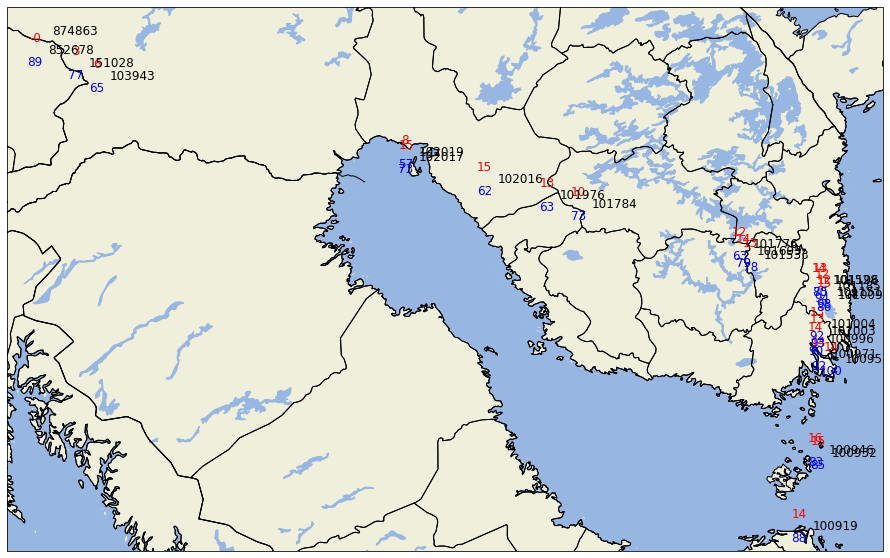

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

stationplot = StationPlot(ax, data.index.levels[2].values, data.index.levels[0].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)
stationplot.plot_parameter(location="NW",parameter=data['1002'].values,color='red')
stationplot.plot_parameter(location="SW",parameter=data['3002'].values,color='blue')


stationplot.plot_text((2, 0),data.index.levels[1].values)

### Plot temperature 

#### example metpy XArray Projection Handling

In [242]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# Any import of metpy will activate the accessors
from metpy.cbook import get_test_data

ds = xr.open_dataset(get_test_data('narr_example.nc', as_file_obj=False))
data_var = ds.metpy.parse_cf('Temperature')
ds

<xarray.Dataset>
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+03 -3.054e+03 ... 678.9 711.4
  * x                    (x) float64 -3.977e+03 -3.945e+03 ... 5.47e+03
Data variables:
    Temperature          (time, isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (time, isobaric, y, x) float32 ...
    v_wind               (time, isobaric, y, x) float32 ...
    Geopotential_height  (time, isobaric, y, x) float32 ...
    Specific_humidity    (time, isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

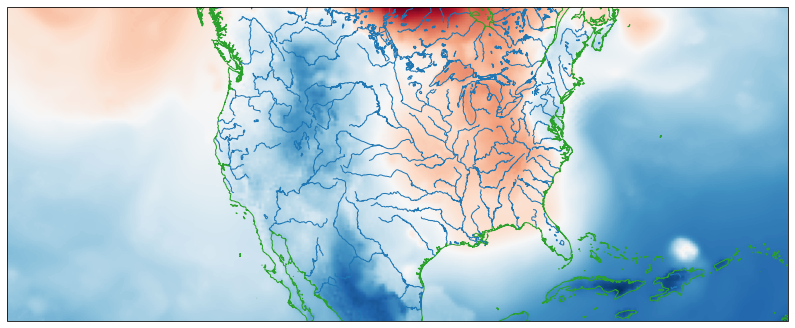

In [243]:
x = data_var.x
y = data_var.y
im_data = data_var.isel(time=0).sel(isobaric=1000.)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)

ax.imshow(im_data, extent=(x.min(), x.max(), y.min(), y.max()),
          cmap='RdBu', origin='lower' if y[0] < y[-1] else 'upper')
ax.coastlines(color='tab:green', resolution='10m')
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')

plt.show()

#### test with IPM data

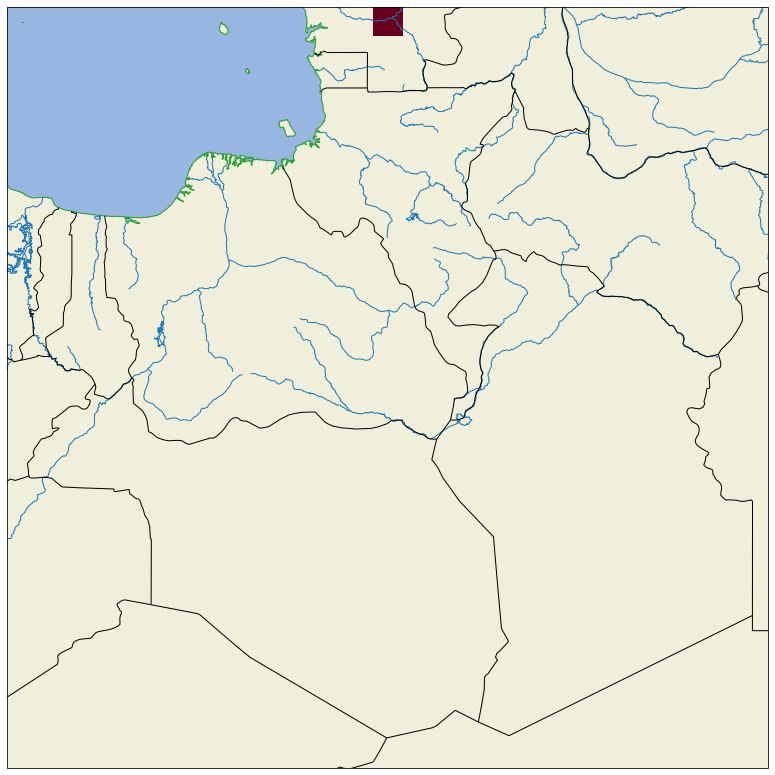

In [390]:
import numpy
ds

data_var = ds.metpy.parse_cf('1002')
x= data_var.lat
y= data_var.lon


im_data = data_var.isel(time=0)

fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)

ax.imshow(numpy.float64(im_data[:,:,0]),
           cmap='RdBu')
ax.coastlines(color='tab:green', resolution='10m')
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)


,,location,time,metpy_crs,1002
lon,lat,,,,
19.13142,60.30098,100919,2020-06-11 21:00:00,Projection: latitude_longitude,12.9


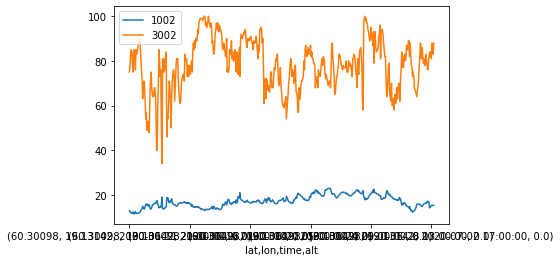

In [392]:
im_data = data_var.isel(time=0)
im_data=im_data.astype(dtype=numpy.float64())

ds.isel(location=0).to_dataframe().plot()

im_data[:,:,0].to_dataframe().dropna()

### Test with xarray tutorial

In [205]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [206]:
dsxarray = xr.tutorial.open_dataset("rasm").load()
dsxarray

<xarray.Dataset>
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

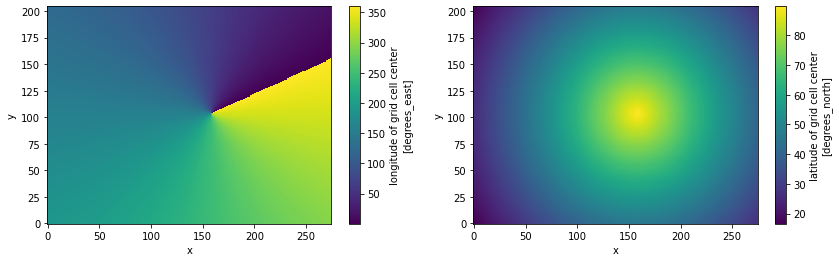

In [207]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
dsxarray.xc.plot(ax=ax1)
dsxarray.yc.plot(ax=ax2)

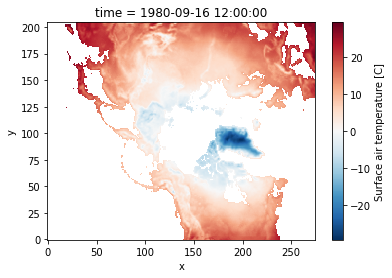

In [208]:
dsxarray.Tair[0].plot()

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

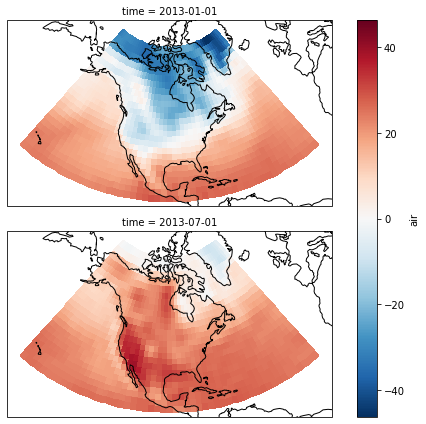

In [219]:
dsxarray2 = xr.tutorial.load_dataset("air_temperature")

air = dsxarray2.air.isel(time=[0, 724]) - 273.15
air
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
p = air.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    col="time",
    col_wrap=1,  # multiplot settings
    aspect=dsxarray2.dims["lon"] / dsxarray2.dims["lat"],  # for a sensible figsize
    subplot_kws={"projection": map_proj},
)  # the plot's projection

for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])
dsxarray2

#### test with IPM data

In [246]:
ds=fmi.data(parameters=[1002,3002],
            stationId=list_station[:25],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',varname='id',savecache=True,usecache=True) 

INFO:start connecting to station 101533
INFO:start connecting to station 101185
INFO:start connecting to station 102017
INFO:start connecting to station 102016
INFO:start connecting to station 102019
INFO:start connecting to station 101976
INFO:start connecting to station 852678
INFO:start connecting to station 874863
INFO:start connecting to station 101695
INFO:start connecting to station 101776
INFO:start connecting to station 101784
INFO:start connecting to station 101528
INFO:start connecting to station 100919
INFO:start connecting to station 100932
INFO:start connecting to station 100946
INFO:start connecting to station 100953
INFO:start connecting to station 101151
INFO:start connecting to station 101196
INFO:start connecting to station 100996
INFO:start connecting to station 101003
INFO:start connecting to station 100971
INFO:start connecting to station 101004
INFO:start connecting to station 101009
INFO:start connecting to station 103943
INFO:start connecting to station 151028


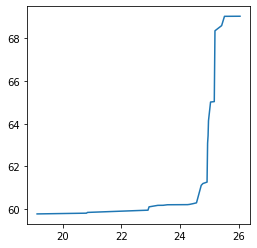

In [235]:
fig, ax1 = plt.subplots(ncols=1, figsize=(4, 4))
ax1.plot(ds.lon, ds.lat)

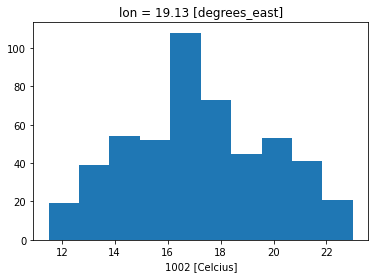

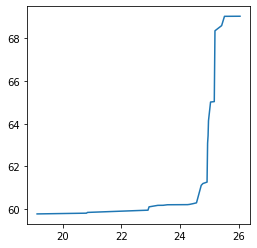

In [239]:
ds['1002'][0].plot()
fig, ax1 = plt.subplots(ncols=1, figsize=(4, 4))
ax1.plot(ds.lon, ds.lat)

## Metpy calculation of dewpoint from relative humidity

In [ ]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xrb

In [ ]:
ds=fmi.data(parameters=[1002,3002],
            stationId=[101533],
            timeStart='2020-06-12',
            timeEnd='2020-07-03',
            timeZone='UTC',
            format='ds',
            varname='id')


In [ ]:
temp = ds['1002']*units.degC
hum=ds['3002']*units.percent

In [ ]:
mpcalc.dewpoint_from_relative_humidity(temp, hum)